In [19]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib as plt
%pylab inline
import random
import seaborn as sns
from sklearn.utils import resample
from matplotlib import rcParams
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
X = np.loadtxt('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MOAT_data/input_parameters_MOAT.txt', delimiter = '\t')
X.shape

(260, 25)

In [33]:
Y = pd.read_excel('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MOAT_data/output_variables_MOAT_runs.xlsx',sheet_name='average_variables')
Y

,ws10,sat,sap,rain,pblh,olr,dswrf,dlwrf
0,5.975,293.940,97074.555,1.180,500.896,240.787,154.812,363.819
1,5.972,293.942,97074.766,1.181,501.418,241.249,154.741,363.759
2,5.965,293.987,97071.719,1.171,501.686,241.225,154.692,364.089
3,5.986,294.002,97066.773,1.185,502.376,241.226,153.941,364.600
4,5.981,294.093,97060.688,1.190,504.013,237.508,153.790,367.528
...,...,...,...,...,...,...,...,...
255,5.028,293.534,97122.102,0.980,534.386,240.774,145.934,363.537
256,5.045,293.458,97122.633,0.990,554.338,240.082,142.467,364.628
257,5.048,293.469,97121.523,0.999,556.233,239.949,142.991,364.585
258,5.137,293.539,97105.594,0.994,563.256,239.423,144.398,363.959


In [34]:
Y = Y.to_numpy()
D = 25
N = 10
EE = np.empty([8,N, D-1])
mu = np.empty((8,D))
mu_star = np.empty((8,D))
sigma = np.empty((8,D))
for m in range(8):
  ee = np.empty([N, D])
  for i in range(N):
      j = np.arange(D+1) + i*(D + 1)
      j1 = j[0:D]
      j2 = j[1:D+1]
      ee[i,:] = np.linalg.solve((X[j2,:] - X[j1,:]), (Y[j2,m] - Y[j1,m])) 
  for j in range(D):
    mu[m,j] = np.average(ee[:,j])
    mu_star[m,j] = np.average(np.abs(ee[:,j]))
    sigma[m,j] = np.std(ee[:,j])
  ee = np.abs(ee)
  ee = np.concatenate((ee[:,0:14],ee[:,15:]),axis=1)
  ee = pd.DataFrame(ee.T)
  ee = (ee-ee.min())/(ee.max()-ee.min())
  ee_t = ee.T
  EE[m,:,:] = ee_t.to_numpy()
df = pd.DataFrame(mu_star.T)
df = pd.concat([df.iloc[0:14,:],df.iloc[15:,:]],axis=0)
df = (df-df.min())/(df.max()-df.min())
df.index = ['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10',
              'P11', 'P12', 'P13','P14', 'P15', 'P16','P17', 'P18', 'P19','P20',
              'P21', 'P22', 'P23','P24']
df.columns = ['WS10','SAT','SAP','RAIN','PBLH','OLR','DSWRF','DLWRF']
variable_names = df.columns
df_t = df.T

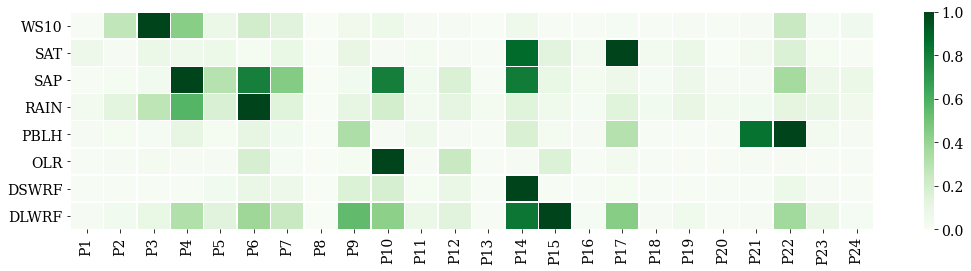

In [35]:
fig = plt.figure(figsize=(18,4))
plt.rc('font', size=14)    # fontsize of the all text
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('xtick', labelsize=14)
ax = fig.add_subplot(1,1,1)
ax = sns.heatmap(df_t,cmap="Greens",linewidths=.5)
ax.set_xticklabels(['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10',
              'P11', 'P12', 'P13','P14','P15','P16','P17', 'P18', 'P19','P20',
              'P21', 'P22', 'P23','P24'],rotation='vertical')
plt.savefig('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MOAT_data//MOAT_heatmap.pdf',dpi=1200,bbox_inches='tight',pad_inches=0.1)

In [36]:
SI = df_t.sum(axis=0).sort_values(ascending=False)
SI.to_csv(r'/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MOAT_data/MOAT_SI.csv',header=None,index=True)

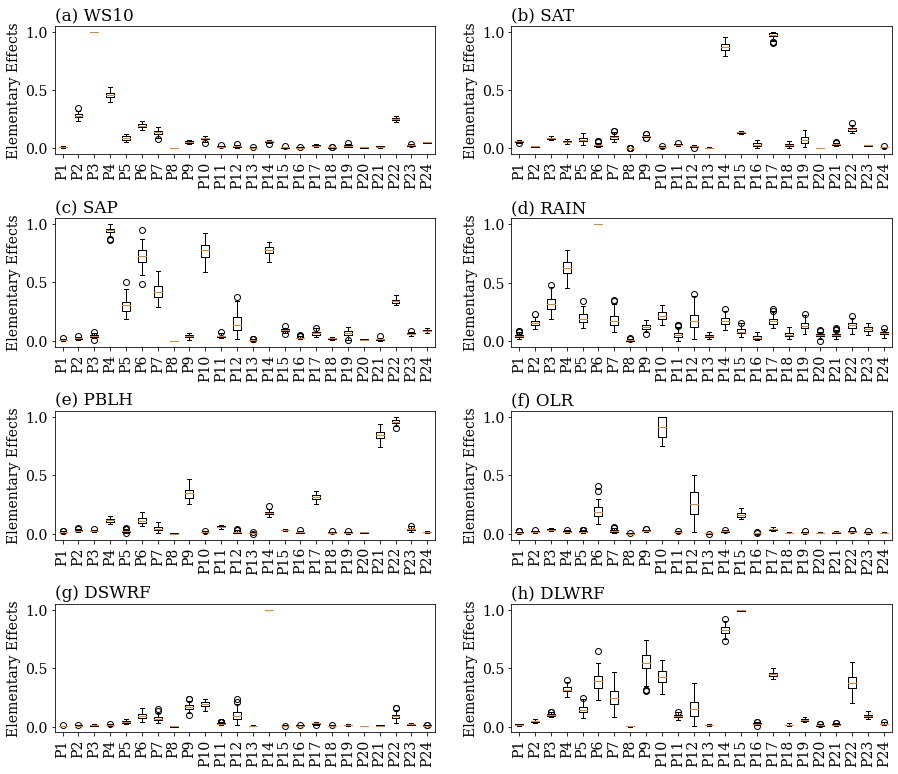

In [37]:
fig = plt.figure(figsize=(15,13))
plt.rc('font', size=14)    # fontsize of the all text
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('xtick', labelsize=14)
abc = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) '] 
for i in range(8):
  DMY = np.zeros((24,1))
  ee = EE[i,:,:]
  for j in range(100):
    dmy = np.array(resample(ee))
    dmy = np.mean(dmy,axis=0)
    dmy = np.reshape(dmy,(24,1))
    DMY = np.append(DMY,dmy,axis=1)
  DMY = DMY[:,1:]
  ax = fig.add_subplot(4,2,i+1)
  ax.boxplot(DMY.T)
  ax.set_title(abc[i]+variable_names[i],loc='left')
  ax.set_xticklabels(['P1', 'P2', 'P3','P4', 'P5', 'P6','P7', 'P8', 'P9','P10',
                'P11', 'P12', 'P13','P14','P15','P16','P17', 'P18', 'P19','P20',
                'P21', 'P22', 'P23','P24'],rotation='vertical')
  ax.set_ylabel('Elementary Effects')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.savefig('/content/drive/MyDrive/Sandeep_and_Harish_work/sensitivityruns/data_for_GMD/MOAT_data/MOAT_boxplot.pdf',dpi=1200,bbox_inches='tight',pad_inches=0.1)